In [1]:
from math import pi, cos, sin, radians
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
from scipy import signal
from scipy.io import wavfile
from scipy.stats import moment, kurtosis

%matplotlib inline

### Helper Funktionen

In [2]:
# Scatterplot mit Histogram
def scatter_hist(x, y, ax, ax_histx, ax_histy, color="tab:blue"):

    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    ax.scatter(x, y, color=color, edgecolor=color, alpha=0.5)
    
    ax_histx.hist(x, bins=50, color=color, edgecolor=color, alpha=0.5)
    ax_histy.hist(y, bins=50, orientation='horizontal', color=color, edgecolor=color, alpha=0.5)

In [3]:
def center_data(x):
    "rows are samples, columns are observations"
    mu = np.mean(x, axis=0, keepdims=True)
    centered =  x - mu
    return centered

### Audio Signale von zwei Mikrofonaufnahmen

In [5]:
# Dimension
dim = 2

# Input the data from the first receiver.
samplingRate, signal1 = wavfile.read('../data/alarm.wav')

print("Sampling rate= ", samplingRate)
print("Data type is ", signal1.dtype)

# Convert the signal so that amplitude lies between 0 and 1.
# uint8 takes values from 0 through 255; sound signals are oscillatory
signal1 = signal1 / 255.0 - 0.5

# Output information about the sound samples.
a = signal1.shape
n = a[0]
print("Number of samples: ", n)
n = n * 1.0

# Input data from the first receiver and standardise it's amplitude.
samplingRate, signal2 = wavfile.read('../data/news.wav')
signal2 = signal2 / 255.0 - 0.5

# x is our initial data matrix.
S = np.array([signal1, signal2])

# A : Mischmatrix
A = np.array([[0.5, 1],
              [0.5, 0.2]])

# Mixed signal matrix
X = np.dot(A, S)

Sampling rate=  8000
Data type is  uint8
Number of samples:  50000


In [8]:
import IPython
IPython.display.Audio('../data/alarm.wav')


In [9]:
IPython.display.Audio('../data/news.wav')

In [10]:
# Ist A invertierbar?
if(np.linalg.matrix_rank(A)!=2):
    print("A must be invertible: {}".format(A))
print(A)

[[0.5 1. ]
 [0.5 0.2]]


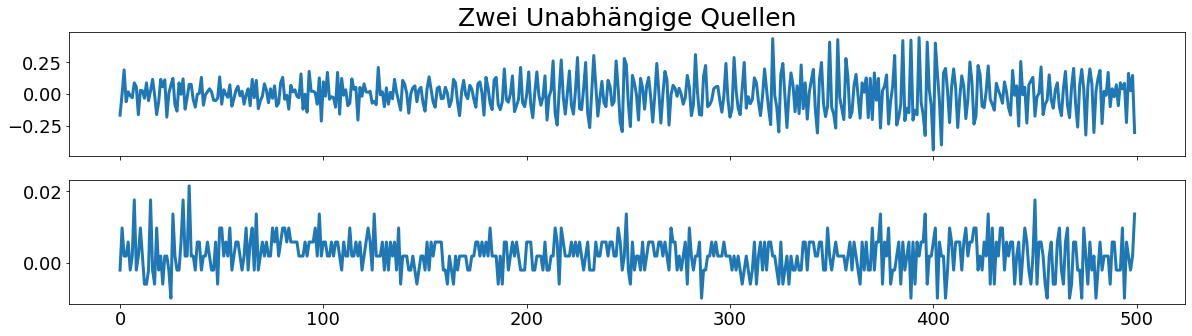

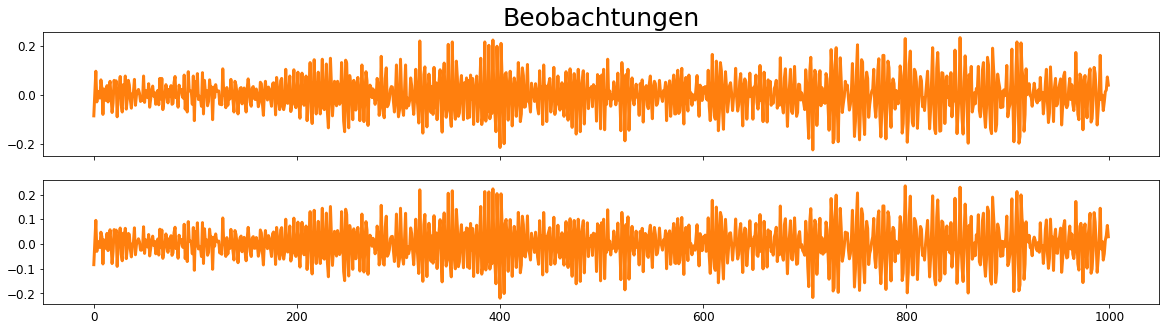

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot Quellen
fig, ax = plt.subplots(2, 1, figsize=[20, 5], sharex=True)
ax[0].plot(S[0][1000:1500], lw=3)
# ax.set_ylim(-2, 2)
# ax.set_xlim(ns[0], ns[300])
ax[0].tick_params(labelsize=18)
ax[0].set_title('Zwei Unabhängige Quellen', fontsize=25)

ax[1].plot(S[1][1000:1500], lw=3)
# ax.set_ylim(-2, 2)
# ax.set_xlim(ns[0], ns[300])
ax[1].tick_params(labelsize=18)
plt.show()

# Plot Beobachtungen
fig, ax = plt.subplots(2, 1, figsize=[20, 5], sharex=True)
ax[0].plot(X[0][1000:2000], lw=3, color="tab:orange")
ax[0].set_title('Beobachtungen', fontsize=25)
ax[0].tick_params(labelsize=12)
# ax[0].set_ylim(-2, 2)
               
ax[1].plot(X[1][1000:2000], lw=3, color="tab:orange")
ax[1].tick_params(labelsize=12)
# ax[1].set_xlim(ns[0], ns[-1])
# ax[1].set_ylim(-2, 2)

plt.show()
plt.tight_layout()

# fig.savefig("figures/VL10/news/sources_observations.png")

###  Raum-Zustand Darstellung der Variablen

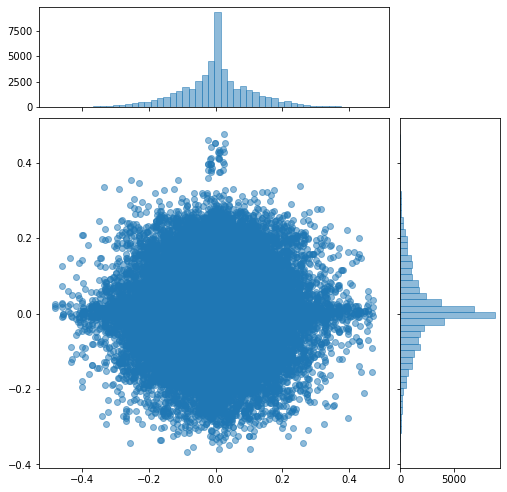

In [12]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

scatter_hist(S[0], S[1], ax, ax_histx, ax_histy, color="tab:blue")
plt.show()
# fig.savefig("figures/VL10/news/joint_distributions_mixtures.png")

## Beobachtungen

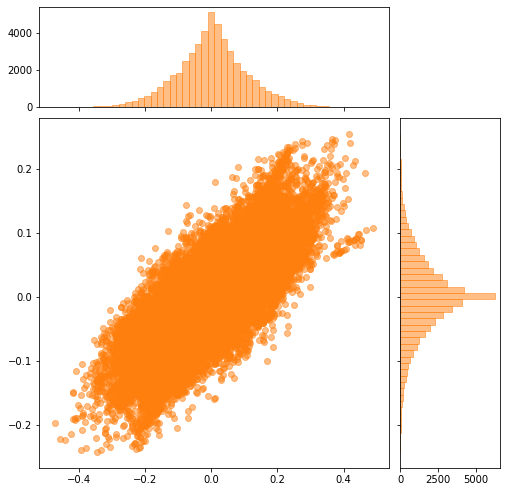

In [13]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

scatter_hist(X[0], X[1], ax, ax_histx, ax_histy, color="tab:orange")
plt.show()
# fig.savefig("figures/VL10/news/joint_distributions_mixtures.png")

## Schritt 1: Whitening

### "Whiten" die Daten mit Hilfe von SVD (Siehe Vorlesung 9)

In [14]:
Xcenter = center_data(X.T)
U, s, Vt = np.linalg.svd(np.cov(Xcenter.T), full_matrices=False)
d = np.diag(1.0 / np.sqrt(s))
whitening_matrix = np.dot(U, np.dot(d, U.T))

# Project data onto whitening matrix
Xwhite = np.dot(whitening_matrix, Xcenter.T)

### Plot whitened Daten

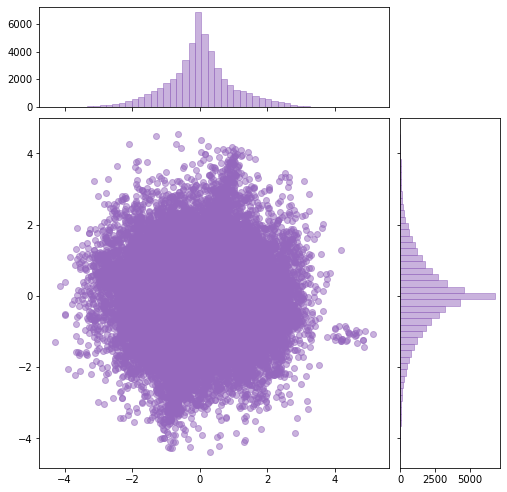

In [15]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

scatter_hist(Xwhite[0], Xwhite[1], ax, ax_histx, ax_histy, color="tab:purple")
plt.show()
# fig.savefig("figures/VL10/news/joint_distributions_white.png")

## Schritt 2: Quellenrekonstruktion via Kurtosis

In [16]:
def kurt(x):
    return moment(x,4) - 3

def rotate(y, theta):
    R = np.array([[cos(theta), -sin(theta)],
                  [sin(theta), cos(theta)]])
    return R.dot(y)

def kurtosisICA(y, angles):
    K = np.zeros((y.shape[0], len(angles))) 
    y_theta_all = []
    for i, theta in enumerate(angles):
#         theta = radians(theta)
        theta = theta * (pi)/180.
        y_theta = rotate(y, theta)
        y_theta_all.append(y_theta)
        K[0][i] = kurtosis(y_theta[0])
        K[1][i] = kurtosis(y_theta[1])
        print(K[0][i], K[1][i])
    
    return y_theta_all, K

def kurtosisICABatchSingleUnit(y, rng, lrate=0.001, eps=0.0001):
    cost_vals = []
    grads = []
    w_hist = []
    w = rng.normal(size=(y.shape[0],1))
    w /= np.linalg.norm(w)
    is_converged = False
    iteration = 0
    while not is_converged:
        w_old = w.copy()
        s_i = w.T @ y
        kurt_val = kurtosis(s_i.T)
        grad =  (y @ (s_i**3).T) * np.sign(kurt_val)
        w = w + lrate*grad
        w /= np.linalg.norm(w)
        cost_vals.append(kurt_val)
        w_hist.append(w)
        is_converged = np.abs((w_old.T @ w) - 1) < eps
        if iteration == 100:
            break
#         print('w', w_old, w, w_old.T @ w, is_converged)
    return w, cost_vals, grads, w_hist

### Plotting Funktion für den Gradientenverlauf

In [17]:
import matplotlib.patheffects as pe
def kurtosisICAContour(y, w_hist=None):
    cost_vals = []
    grads = []
    wx = wy = np.linspace(-1.1, 1.1, 100, endpoint=True)
    wxx, wyy = np.meshgrid(wx, wy)
    z = np.zeros_like(wxx)
    for r in range(z.shape[0]):
        for c in range(z.shape[0]):
            w = np.array([wxx[r,c], wyy[r,c]]).reshape(-1,1)
            s_i = w.T @ y
            z[r,c] = kurtosis(s_i.T)
    fig, ax = plt.subplots(1, 1, figsize=(11,9), dpi=60)
    cnf = ax.contourf(wxx, wyy, z, levels=40, cmap='viridis')
    ax.set_xlabel('$w_1$', fontsize=18)
    ax.set_ylabel('$w_2$', fontsize=18)
    ax.set_title('Kurtosis-Wert', fontsize=18)
    th = np.linspace(0,np.pi*2,100)
    ax.plot(0.98*np.cos(th), 0.98*np.sin(th),
            linewidth=2,
            color='k',
           )
    ax.plot(1.02*np.cos(th), 1.02*np.sin(th),
            linewidth=2,
            color='k',
           )
    cbar = fig.colorbar(cnf)
    ax.set_aspect('equal')
    if w_hist is not None:
        w_hist = np.squeeze(w_hist)
        print(w_hist.shape)
        print(w_hist)
        ax.plot(w_hist[:,0], w_hist[:,1], marker='x', color='cyan', lw=4)
    return fig, ax


### Extrahierung der ersten Quelle

#### Gemischtes Signal anhören:

In [18]:
from IPython.display import Audio
Audio(X[0], rate=8000)

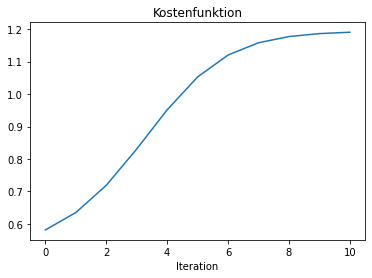

In [19]:
rng = np.random.default_rng(123)
w, cost_vals, grads, w_hist = kurtosisICABatchSingleUnit(Xwhite, rng)

fig, ax = plt.subplots(1,1)
ax.plot(cost_vals)
ax.set_title('Kostenfunktion')
ax.set_xlabel('Iteration')

s_1 = w.T @ Xwhite
from IPython.display import Audio
Audio(s_1, rate=8000)

(11, 2)
[[-0.95562396 -0.2945893 ]
 [-0.97431309 -0.2251977 ]
 [-0.98980181 -0.14245134]
 [-0.99853476 -0.05411415]
 [-0.99959417  0.02848668]
 [-0.99532595  0.09657253]
 [-0.98904196  0.14763472]
 [-0.98296371  0.18379973]
 [-0.97798617  0.2086697 ]
 [-0.97423336  0.22554238]
 [-0.97152798  0.23692486]]


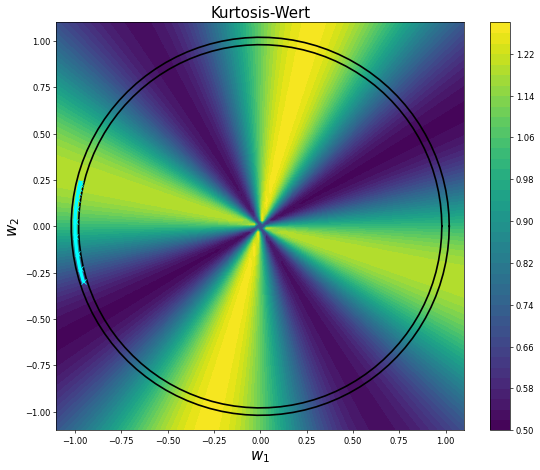

In [20]:
fig, ax = kurtosisICAContour(Xwhite, w_hist=np.array(w_hist))

### Extrahierung der zweiten (?) Quelle durch Wiederholung

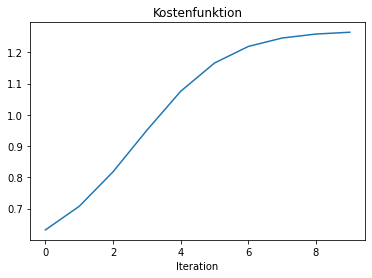

In [21]:
rng = np.random.default_rng(2)
w, cost_vals, grads, w_hist = kurtosisICABatchSingleUnit(Xwhite, rng)

fig, ax = plt.subplots(1,1)
ax.plot(cost_vals)
ax.set_title('Kostenfunktion')
ax.set_xlabel('Iteration')

s_2 = w.T @ Xwhite
from IPython.display import Audio
Audio(s_2, rate=8000)

(10, 2)
[[ 0.275823   -0.96120844]
 [ 0.19558227 -0.9806873 ]
 [ 0.10469494 -0.99450438]
 [ 0.01435084 -0.99989702]
 [-0.06374607 -0.99796615]
 [-0.12384121 -0.99230205]
 [-0.16668238 -0.98601064]
 [-0.19598226 -0.98060744]
 [-0.21562912 -0.97647534]
 [-0.22869034 -0.97349922]]


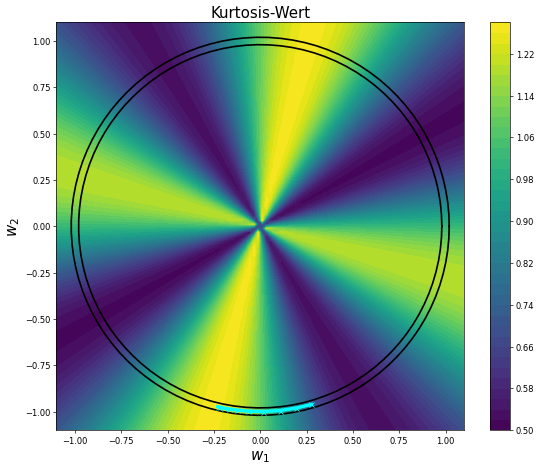

In [22]:
fig, ax = kurtosisICAContour(Xwhite, w_hist=np.array(w_hist))

### Rekonstruktion mit sklearn's FastICA

In [24]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X.T)  # Reconstruct signals

/Users/fatma/Work_local/venvs/py3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:470: UserWarning: n_components is too large: it will be set to 2
  % n_components


In [25]:
Audio(S_[:, 0], rate=8000)

In [26]:
Audio(S_[:, 1], rate=8000)